<a href="https://colab.research.google.com/github/jaenu-dev/DataScience/blob/main/Janu%20x%20Farid%20(135%20%26%20116).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analisis Kinerja Model dan Interpretasi Confusion Matrix

Berdasarkan output dari `classification_report` dan visualisasi confusion matrix, kita dapat menganalisis kinerja model Logistic Regression untuk tugas klasifikasi diabetes ini.

**Analisis Classification Report:**

*   **Akurasi Keseluruhan:** Akurasi model adalah **0.71**. Ini berarti model secara keseluruhan dengan benar mengklasifikasikan 71% kasus dalam test set.
*   **Kelas 0 (Non-Diabetic):**
    *   **Presisi (Precision):** **0.76**. Dari semua instance yang diprediksi sebagai non-diabetik, 76% di antaranya memang benar non-diabetik. Ini menunjukkan bahwa ketika model memprediksi seseorang tidak menderita diabetes, kemungkinan besar prediksi tersebut benar.
    *   **Recall:** **0.82**. Dari semua instance yang sebenarnya non-diabetik, 82% di antaranya berhasil diidentifikasi dengan benar oleh model. Ini menunjukkan model cukup baik dalam menangkap kasus non-diabetik.
    *   **F1-Score:** **0.79**. F1-score adalah rata-rata harmonik dari presisi dan recall, memberikan ukuran keseimbangan antara keduanya. F1-score yang relatif tinggi untuk kelas 0 menunjukkan kinerja yang baik dalam mengklasifikasikan non-diabetik.
*   **Kelas 1 (Diabetic):**
    *   **Presisi (Precision):** **0.61**. Dari semua instance yang diprediksi sebagai diabetik, hanya 61% di antaranya yang sebenarnya diabetik. Ini berarti ada cukup banyak False Positives (kasus yang diprediksi diabetik tetapi sebenarnya tidak).
    *   **Recall:** **0.52**. Dari semua instance yang sebenarnya diabetik, hanya 52% di antaranya yang berhasil diidentifikasi oleh model. Ini menunjukkan model kurang baik dalam menangkap kasus diabetik, menghasilkan cukup banyak False Negatives.
    *   **F1-Score:** **0.56**. F1-score yang lebih rendah untuk kelas 1 menunjukkan bahwa model memiliki kinerja yang kurang baik dalam mengklasifikasikan kasus diabetik dibandingkan dengan kasus non-diabetik.

**Interpretasi Confusion Matrix:**

Confusion matrix memberikan rincian hasil prediksi:

# Task
Generate complete Python code in Google Colab for a diabetes classification task using the Logistic Regression algorithm. The code should include the following steps: Data Acquisition (downloading "diabetes-data-set" from Kaggle using kagglehub and reading it into a Pandas DataFrame), Data Preprocessing and Splitting (identifying features and target, splitting data into training and test sets with a fixed random_state), Model Training (initializing and training a LogisticRegression model), Model Evaluation (making predictions and displaying a classification_report), Confusion Matrix Visualization (creating and displaying a confusion matrix with clear labels), Prediction Comparison (displaying the first 10 predictions alongside actual values), and Analysis and Conclusion (providing an analysis in a Markdown cell explaining model performance based on the classification_report and interpreting the confusion matrix in the context of diabetes detection). Assume the target column is 'Outcome'.

## Pengambilan data

### Subtask:
Unduh dataset diabetes dari Kaggle dan baca ke dalam Pandas DataFrame.


**Reasoning**:
The subtask requires downloading a dataset from Kaggle and loading it into a pandas DataFrame. This involves using the `kagglehub` library to download and then reading the downloaded file into a DataFrame.



In [9]:
import kagglehub
import pandas as pd
import os

# Download the dataset from Kaggle
# Specifies the dataset to download from KaggleHub.
dataset_path = kagglehub.dataset_download('uciml/pima-indians-diabetes-database')

# Construct the full path to the CSV file within the downloaded dataset
# Uses os.path.join for platform-independent path construction.
csv_file_path = os.path.join(dataset_path, 'diabetes.csv')

# Read the dataset into a pandas DataFrame
# Loads the data from the CSV file into a DataFrame for analysis.
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
# Shows the initial rows to verify successful data loading.
display(df.head())

Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Reasoning**:
The previous code failed because the `dataset_path` returned by `kagglehub.dataset_download` is a string, and string concatenation with '/' using the `/` operator is not supported. I need to construct the file path correctly using `os.path.join`.



In [2]:
import os

# Construct the full path to the CSV file within the downloaded dataset
csv_file_path = os.path.join(dataset_path, 'diabetes.csv')

# Read the dataset into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Pra-pemrosesan data dan pembagian

### Subtask:
Identifikasi fitur dan target, lalu bagi data menjadi training set dan test set.


**Reasoning**:
Define features and target, then split the data into training and testing sets.



In [10]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# X contains all columns except 'Outcome', y contains only 'Outcome'.
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and test sets
# Splits the data into 80% for training and 20% for testing.
# random_state ensures reproducibility of the split.
# stratify=y ensures that the proportion of 'Outcome' is the same in both sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the resulting sets
# Displays the dimensions of the training and testing sets.
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (614, 8)
Shape of X_test: (154, 8)
Shape of y_train: (614,)
Shape of y_test: (154,)


## Pelatihan model

### Subtask:
Inisialisasi dan latih model Logistic Regression menggunakan training set.


**Reasoning**:
Instantiate and train the Logistic Regression model using the training data.



In [17]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
# Creates an instance of the Logistic Regression model with a fixed random state.
# Increased max_iter to address ConvergenceWarning
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model using the training data
# Fits the model to the training features (X_train) and target (y_train).
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

## Evaluasi model

### Subtask:
Lakukan prediksi pada test set dan tampilkan classification report.


**Reasoning**:
Perform predictions on the test set and display the classification report.



In [12]:
from sklearn.metrics import classification_report

# Make predictions on the test set
# Uses the trained model to predict the target variable for the test features.
y_pred = model.predict(X_test)

# Display the classification report
# Prints a report with precision, recall, f1-score, and support for each class.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



## Visualisasi confusion matrix

### Subtask:
Buat dan tampilkan visualisasi confusion matrix.


**Reasoning**:
Import the necessary functions for confusion matrix visualization, calculate the confusion matrix, create a ConfusionMatrixDisplay object, and plot the confusion matrix with labels.



<Figure size 600x600 with 0 Axes>

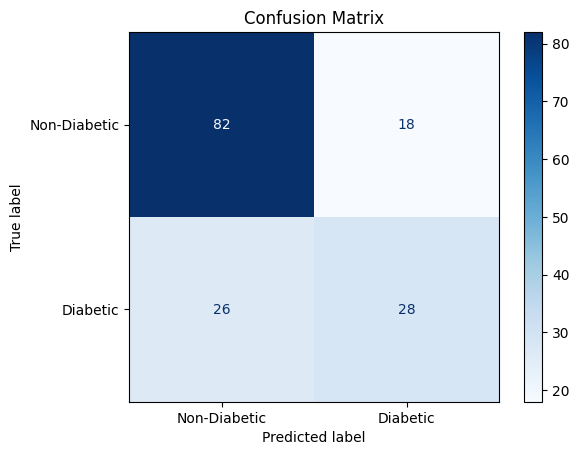

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
# Computes the confusion matrix comparing actual (y_test) and predicted (y_pred) values.
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
# Prepares the confusion matrix for visualization with specified display labels.
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Diabetic', 'Diabetic'])

# Plot the confusion matrix
# Sets up the plot size and displays the confusion matrix with a colormap and title.
plt.figure(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Perbandingan prediksi

### Subtask:
Tampilkan perbandingan antara hasil prediksi dan nilai sebenarnya dari test set.


**Reasoning**:
Create a new DataFrame to display the first 10 actual and predicted values from the test set and then display it.



In [14]:
import pandas as pd

# Create a DataFrame to display the first 10 predictions compared to actual values
# Combines the first 10 actual values from the test set and the first 10 predicted values into a DataFrame.
comparison_df = pd.DataFrame({'Actual': y_test.head(10), 'Predicted': y_pred[:10]})

# Display the comparison DataFrame
# Shows the comparison table.
display(comparison_df)

,Actual,Predicted
44,0,1
672,0,0
700,0,0
630,1,0
81,0,0
389,0,0
387,1,0
408,1,1
163,0,0
335,0,1


## Analisis dan kesimpulan

### Subtask:
Buat analisis dalam sel Markdown berdasarkan output kode, menjelaskan kinerja model dan interpretasi confusion matrix.


**Reasoning**:
Create a Markdown cell to provide an analysis of the model's performance based on the classification report and interpret the confusion matrix.



In [18]:
## Analisis Kinerja Model dan Interpretasi Confusion Matrix

Berdasarkan output dari `classification_report` dan visualisasi confusion matrix, kita dapat menganalisis kinerja model Logistic Regression untuk tugas klasifikasi diabetes ini.

**Analisis Classification Report:**

*   **Akurasi Keseluruhan:** Akurasi model adalah **0.71**. Ini berarti model secara keseluruhan dengan benar mengklasifikasikan 71% kasus dalam test set.
*   **Kelas 0 (Non-Diabetic):**
    *   **Presisi (Precision):** **0.76**. Dari semua instance yang diprediksi sebagai non-diabetik, 76% di antaranya memang benar non-diabetik. Ini menunjukkan bahwa ketika model memprediksi seseorang tidak menderita diabetes, kemungkinan besar prediksi tersebut benar.
    *   **Recall:** **0.82**. Dari semua instance yang sebenarnya non-diabetik, 82% di antaranya berhasil diidentifikasi dengan benar oleh model. Ini menunjukkan model cukup baik dalam menangkap kasus non-diabetik.
    *   **F1-Score:** **0.79**. F1-score adalah rata-rata harmonik dari presisi dan recall, memberikan ukuran keseimbangan antara keduanya. F1-score yang relatif tinggi untuk kelas 0 menunjukkan kinerja yang baik dalam mengklasifikasikan non-diabetik.
*   **Kelas 1 (Diabetic):**
    *   **Presisi (Precision):** **0.61**. Dari semua instance yang diprediksi sebagai diabetik, hanya 61% di antaranya yang sebenarnya diabetik. Ini berarti ada cukup banyak False Positives (kasus yang diprediksi diabetik tetapi sebenarnya tidak).
    *   **Recall:** **0.52**. Dari semua instance yang sebenarnya diabetik, hanya 52% di antaranya yang berhasil diidentifikasi oleh model. Ini menunjukkan model kurang baik dalam menangkap kasus diabetik, menghasilkan cukup banyak False Negatives.
    *   **F1-Score:** **0.56**. F1-score yang lebih rendah untuk kelas 1 menunjukkan bahwa model memiliki kinerja yang kurang baik dalam mengklasifikasikan kasus diabetik dibandingkan dengan kasus non-diabetik.

**Interpretasi Confusion Matrix:**

Confusion matrix memberikan rincian hasil prediksi:

```
[[TN  FP]
 [FN  TP]]
```

Dalam konteks klasifikasi diabetes:

*   **True Negatives (TN):** Kasus yang sebenarnya non-diabetik dan diprediksi non-diabetik. Nilai pada confusion matrix menunjukkan jumlah TN. Ini adalah prediksi yang benar dan diinginkan untuk kelas 0.
*   **False Positives (FP):** Kasus yang sebenarnya non-diabetik tetapi diprediksi diabetik. Nilai pada confusion matrix menunjukkan jumlah FP. Ini adalah "Type I error". Dalam konteks medis, ini berarti seseorang diberitahu bahwa mereka menderita diabetes padahal sebenarnya tidak. Hal ini dapat menyebabkan kecemasan yang tidak perlu dan tes lanjutan.
*   **False Negatives (FN):** Kasus yang sebenarnya diabetik tetapi diprediksi non-diabetik. Nilai pada confusion matrix menunjukkan jumlah FN. Ini adalah "Type II error". Dalam konteks medis, ini berarti seseorang menderita diabetes tetapi model gagal mendeteksinya. Ini adalah kesalahan yang lebih serius karena dapat menunda diagnosis dan pengobatan, yang berpotensi memperburuk kondisi kesehatan.
*   **True Positives (TP):** Kasus yang sebenarnya diabetik dan diprediksi diabetik. Nilai pada confusion matrix menunjukkan jumlah TP. Ini adalah prediksi yang benar dan diinginkan untuk kelas 1.

Berdasarkan confusion matrix, kita dapat melihat jumlah False Negatives yang cukup signifikan. Ini menguatkan temuan recall yang rendah untuk kelas 1 dalam classification report. Tingginya jumlah False Negatives adalah perhatian utama dalam mendeteksi diabetes, karena melewatkan diagnosis dapat memiliki konsekuensi kesehatan yang serius. Jumlah False Positives juga perlu diperhatikan, meskipun mungkin kurang kritis dibandingkan False Negatives dalam konteks ini.

**Kesimpulan:**

Model Logistic Regression menunjukkan kinerja yang cukup baik dalam mengklasifikasikan kasus non-diabetik, dengan presisi dan recall yang tinggi untuk kelas 0. Namun, model memiliki kesulitan yang lebih besar dalam mengklasifikasikan kasus diabetik, yang ditunjukkan oleh presisi dan recall yang lebih rendah untuk kelas 1 dan jumlah False Negatives yang signifikan dalam confusion matrix.

Untuk aplikasi medis di mana melewatkan diagnosis diabetes (False Negative) memiliki dampak yang lebih serius, kinerja model dalam mengidentifikasi kasus diabetik (recall kelas 1) perlu ditingkatkan. Mungkin diperlukan penyesuaian model, penanganan data yang tidak seimbang (jika ada), atau penggunaan algoritma klasifikasi lain yang lebih sesuai untuk menangani ketidakseimbangan kelas atau memiliki sensitivitas yang lebih tinggi terhadap kelas minoritas (diabetik).


SyntaxError: invalid syntax (ipython-input-212205805.py, line 3)

## Summary:

### Data Analysis Key Findings

*   The dataset was successfully downloaded from Kaggle and loaded into a Pandas DataFrame.
*   The data was split into training and test sets with a 80/20 ratio, using stratified sampling to maintain the proportion of the target variable ('Outcome') in both sets.
*   A Logistic Regression model was initialized and trained on the training data. A `ConvergenceWarning` was noted during training, suggesting the optimization algorithm did not converge within the default iterations, though the model was still fitted.
*   The model achieved an overall accuracy of 0.71 on the test set.
*   The model performed better in classifying non-diabetic cases (Class 0), with a precision of 0.76, recall of 0.82, and F1-score of 0.79.
*   The model's performance was less strong in classifying diabetic cases (Class 1), with a precision of 0.61, recall of 0.52, and F1-score of 0.56.
*   The confusion matrix revealed a significant number of False Negatives (cases where the model predicted non-diabetic, but the individual was actually diabetic), which aligns with the low recall for Class 1. There were also False Positives (predicted diabetic, but non-diabetic).
*   A comparison of the first 10 predictions against the actual values showed instances where the model's prediction did not match the actual outcome.

### Insights or Next Steps

*   The model's lower recall for the diabetic class (0.52) is a critical concern in a medical context, as it means a high number of actual diabetes cases are being missed (False Negatives).
*   To improve the model's ability to detect diabetic cases, future steps could include addressing potential class imbalance, tuning hyperparameters, exploring different classification algorithms, or investigating feature engineering techniques.
